In [2]:
#Import all relevant libraries
import numpy as np
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.graph_objects as plo
import plotly.express as px

## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [3]:
#Read in the csv file and convert to a Pandas dataframe
df_CWU = pd.read_csv("..\data\cwr.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [4]:
df_CWU.head(20)

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\r\n CWUR Rating System: ...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\r\n Edu...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\r\n Education: A+; Employ...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\r\n Education: A+; Em...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\r\n Education: A+; Emplo...,United Kingdom,2,7,27,9,4,93.3
5,6Top 0.1%,Princeton University\r\n Education: A+; Emplo...,USA,4,5,16,6,82,92.6
6,7Top 0.1%,University of Chicago\r\n Education: A+; Empl...,USA,5,8,15,22,28,92.1
7,8Top 0.1%,Columbia University\r\n Education: A+; Employ...,USA,6,12,14,10,13,91.6
8,9Top 0.1%,University of Pennsylvania\r\n Education: A; ...,USA,7,14,8,45,12,91.2
9,10Top 0.1%,Yale University\r\n Education: A+; Employabil...,USA,8,6,35,13,21,90.8


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [5]:
df_CWU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   World Rank          2000 non-null   object 
 1   University Names    2000 non-null   object 
 2   Location            2000 non-null   object 
 3   National Rank       2000 non-null   int64  
 4   Educational Rank    2000 non-null   object 
 5   Employability Rank  2000 non-null   object 
 6   Faculty Rank        2000 non-null   object 
 7   Research Rank       2000 non-null   object 
 8   Score               2000 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 140.8+ KB


In [6]:
df_CWU.shape

(2000, 9)

In [7]:
df_CWU.describe()

,National Rank,Score
count,2000.000000,2000.00000
mean,69.245000,71.75555
std,85.538608,5.03880
min,1.000000,66.00000
25%,9.750000,67.90000
50%,33.000000,70.40000
75%,89.000000,74.30000
max,332.000000,100.00000


In [23]:
df_CWU.columns

Index(['World Rank', 'University Names', 'Location', 'National Rank',
       'Educational Rank', 'Employability Rank', 'Faculty Rank',
       'Research Rank', 'Score'],
      dtype='object')

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [24]:
'''
When examining the reliability of the world university rankings dataset from Kaggle,
it's vital to scrutinize both its source and collection process. Assessing Kaggle's 
credibility and the contributors' expertise offers insight into the dataset's reliability.
Additionally, understanding the methodologies used in ranking universities and any potential
biases aids in gauging its trustworthiness. Transparent documentation of data collection
procedures and validation methods enhances reliability.
 
'''

"\nWhen examining the reliability of the world university rankings dataset from Kaggle,\nit's vital to scrutinize both its source and collection process. Assessing Kaggle's \ncredibility and the contributors' expertise offers insight into the dataset's reliability.\nAdditionally, understanding the methodologies used in ranking universities and any potential\nbiases aids in gauging its trustworthiness. Transparent documentation of data collection\nprocedures and validation methods enhances reliability.\n \n"

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [25]:
'''
Given the dataset sourced from Kaggle on world university rankings, ensuring timeliness
necessitates scrutiny of the data's currency and alignment with the present educational 
landscape. Checking the date of data collection or last update is paramount, as significant
temporal gaps may diminish its relevance. Comparisons with recent rankings from reputable 
sources offer valuable insights into the dataset's contemporaneity. Moreover, understanding
any alterations in ranking methodologies over time is crucial for maintaining consistency 
in analyses. Contextual understanding is indispensable; while historical data may suffice for
trend analysis, contemporary decisions warrant more recent information. Regular checks for
updates or corrections to the dataset, along with validation from external sources, bolster 
confidence in its suitability for current analyses.

'''

"\nGiven the dataset sourced from Kaggle on world university rankings, ensuring timeliness\nnecessitates scrutiny of the data's currency and alignment with the present educational \nlandscape. Checking the date of data collection or last update is paramount, as significant\ntemporal gaps may diminish its relevance. Comparisons with recent rankings from reputable \nsources offer valuable insights into the dataset's contemporaneity. Moreover, understanding\nany alterations in ranking methodologies over time is crucial for maintaining consistency \nin analyses. Contextual understanding is indispensable; while historical data may suffice for\ntrend analysis, contemporary decisions warrant more recent information. Regular checks for\nupdates or corrections to the dataset, along with validation from external sources, bolster \nconfidence in its suitability for current analyses.\n\n"

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [26]:
'''
Ensuring consistency within the dataset and across multiple data sources is paramount when 
analyzing the world university rankings dataset from Kaggle. It requires meticulous 
verification that data points remain uniform throughout the dataset
'''

'\nEnsuring consistency within the dataset and across multiple data sources is paramount when \nanalyzing the world university rankings dataset from Kaggle. It requires meticulous \nverification that data points remain uniform throughout the dataset\n'

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [27]:
# All columns will be taken into account for the problem statment solution, so no columns will be deleted.

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [28]:
# It's great we don't have duplicate rows
df_CWU.duplicated().sum()

0

In [29]:
# Check more
df_CWU[df_CWU.duplicated()]

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score


#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [30]:
#Display number missing values per column
df_CWU.isnull().sum().sort_values(ascending = False)

World Rank            0
University Names      0
Location              0
National Rank         0
Educational Rank      0
Employability Rank    0
Faculty Rank          0
Research Rank         0
Score                 0
dtype: int64

In [31]:
# But there are many values ​​​​that have been replaced by (-), as shown in the table
df_CWU

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\r\n CWUR Rating System: ...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\r\n Edu...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\r\n Education: A+; Employ...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\r\n Education: A+; Em...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\r\n Education: A+; Emplo...,United Kingdom,2,7,27,9,4,93.3
...,...,...,...,...,...,...,...,...,...
1995,1996Top 9.8%,Chongqing Jiaotong University,China,314,0,0,0,1917,66.0
1996,1997Top 9.8%,University of Arkansas at Little Rock,USA,332,0,1322,0,1920,66.0
1997,1998Top 9.8%,Van Yüzüncü Yıl University,Turkey,54,0,0,0,1919,66.0
1998,1999Top 9.8%,Bharathidasan University,India,64,0,0,0,1922,66.0


**<p style= "color: red">A way has been discovered to compensate for the missing values ​​by taking advantage of the score. 
 The method of calculation was researched and this equation was written, it was discovered that we will lose
 the some value. Therefore, we will compensate for the missing  values ​​with 999 to 
 symbolize that they have no rank .</p>**
<a href=https://cwur.org/methodology/world-university-rankings.php>https://cwur.org/methodology/world-university-rankings.php</a>

In [32]:

'''
df_CWU['Educational Rank'] = (df_CWU['Score']  ) * .25 
df_CWU['Employability Rank'] = (df_CWU['Score']) * .25
df_CWU['Faculty Rank'] = (df_CWU['Score'] ) * .10
df_CWU['Research Rank'] = (df_CWU['Score'] ) * .40


# Round the rank values to two decimal places
df_CWU['Educational Rank'] = df_CWU['Educational Rank'].round(2)
df_CWU['Employability Rank'] = df_CWU['Employability Rank'].round(2)
df_CWU['Faculty Rank'] = df_CWU['Faculty Rank'].round(2)
df_CWU['Research Rank'] = df_CWU['Research Rank'].round(2)

'''

"\ndf_CWU['Educational Rank'] = (df_CWU['Score']  ) * .25 \ndf_CWU['Employability Rank'] = (df_CWU['Score']) * .25\ndf_CWU['Faculty Rank'] = (df_CWU['Score'] ) * .10\ndf_CWU['Research Rank'] = (df_CWU['Score'] ) * .40\n\n\n# Round the rank values to two decimal places\ndf_CWU['Educational Rank'] = df_CWU['Educational Rank'].round(2)\ndf_CWU['Employability Rank'] = df_CWU['Employability Rank'].round(2)\ndf_CWU['Faculty Rank'] = df_CWU['Faculty Rank'].round(2)\ndf_CWU['Research Rank'] = df_CWU['Research Rank'].round(2)\n\n"

In [33]:
# df_CWU

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [34]:
# check columns types
df_CWU.dtypes 

World Rank             object
University Names       object
Location               object
National Rank           int64
Educational Rank       object
Employability Rank     object
Faculty Rank           object
Research Rank          object
Score                 float64
dtype: object

**<p style="color:red">We found that Educational, Employability, Faculty, and Research need cleaning before type changing (solved in Clean Data)</p>**

In [35]:
# go to clean them
# Do not forget, in the beginning, you must deal with missing Value to convert it to 999, 
# and this was done in the Data Cleaning so running it first.

df_CWU['Educational Rank'] = df_CWU['Educational Rank'].astype(int)
df_CWU['Employability Rank'] = df_CWU['Employability Rank'].astype(int)
df_CWU['Faculty Rank'] = df_CWU['Faculty Rank'].astype(int)
df_CWU['Research Rank'] = df_CWU['Research Rank'].astype(int)


In [36]:
df_CWU.dtypes

World Rank             object
University Names       object
Location               object
National Rank           int64
Educational Rank        int32
Employability Rank      int32
Faculty Rank            int32
Research Rank           int32
Score                 float64
dtype: object

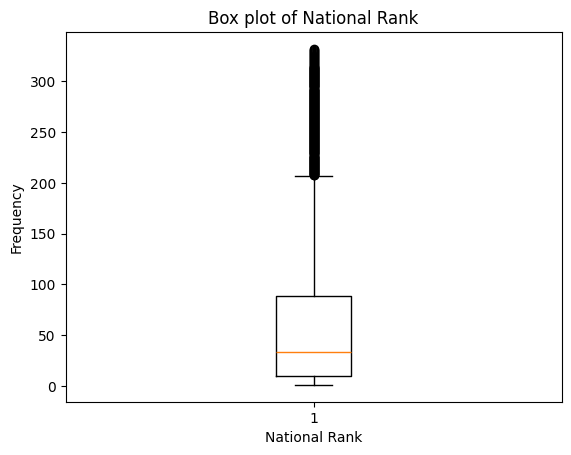

In [37]:
# check outliers 
plt.boxplot(df_CWU['National Rank'])
plt.xlabel('National Rank')
plt.ylabel('Frequency')
plt.title(f'Box plot of National Rank')
plt.show()

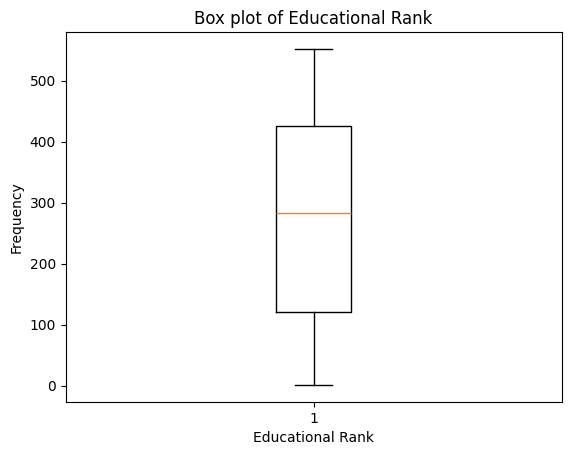

In [38]:
plt.boxplot(df_CWU[df_CWU['Educational Rank'] != 0]['Educational Rank'])
plt.xlabel('Educational Rank')
plt.ylabel('Frequency')
plt.title(f'Box plot of Educational Rank')
plt.show()

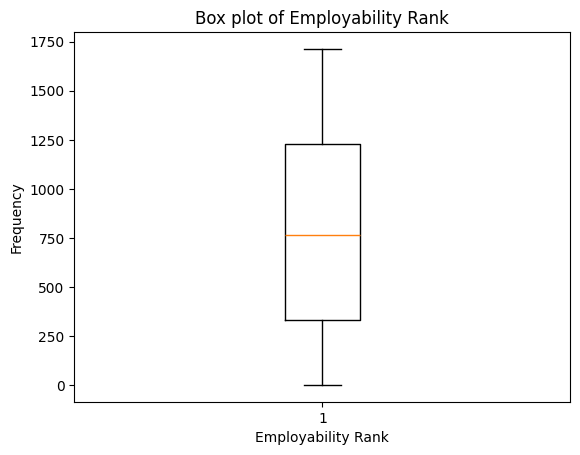

In [39]:
plt.boxplot(df_CWU[df_CWU['Employability Rank'] != 0]['Employability Rank'])
plt.xlabel('Employability Rank')
plt.ylabel('Frequency')
plt.title(f'Box plot of Employability Rank')
plt.show()

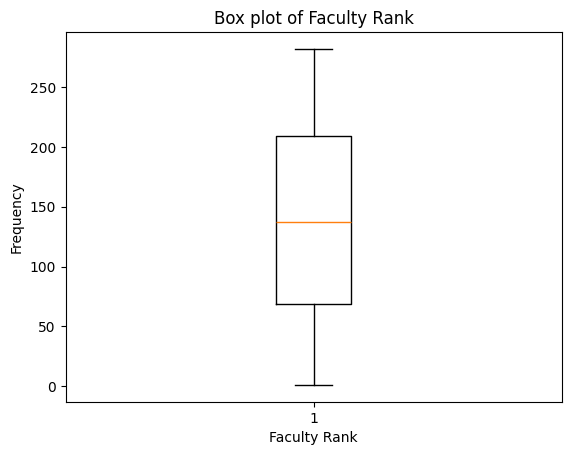

In [40]:
plt.boxplot(df_CWU[df_CWU['Faculty Rank'] != 0]['Faculty Rank'])
plt.xlabel('Faculty Rank')
plt.ylabel('Frequency')
plt.title(f'Box plot of Faculty Rank')
plt.show()

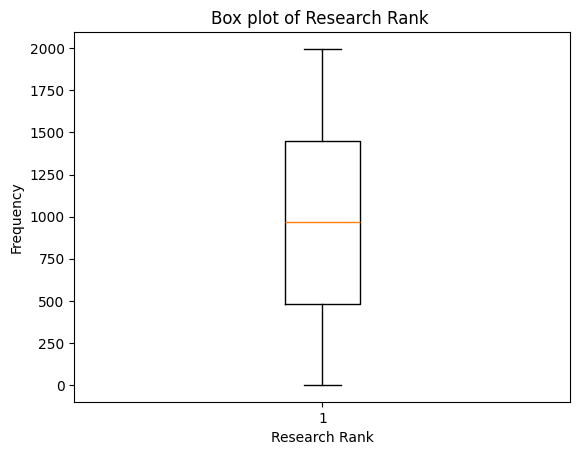

In [41]:
plt.boxplot(df_CWU[df_CWU['Research Rank'] != 0]['Research Rank'])
plt.xlabel('Research Rank')
plt.ylabel('Frequency')
plt.title(f'Box plot of Research Rank ')
plt.show()

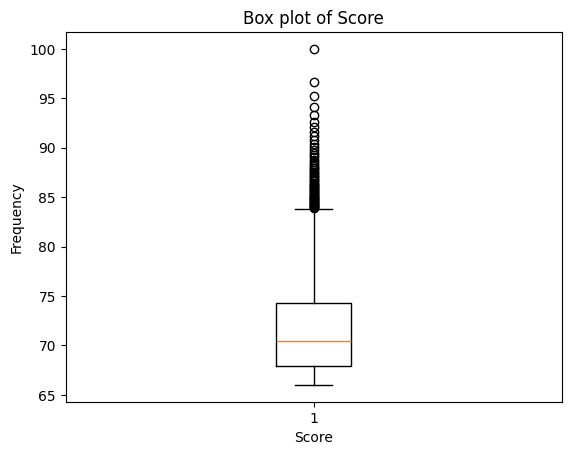

In [42]:
# we removed 66 because it is repeated for the last ranks (maybe removed later)
plt.boxplot(df_CWU['Score'])
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title(f'Box plot of Score')
plt.show()

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [43]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [44]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [45]:
# go to delete ouliers

**<p style="color:red">We have many outliers due to filling the empty nulls with a constant. thus, we will be ignoring it for now</h>**

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [46]:
# Replace missing values with 999 in specified columns
columns_to_replace = ['Educational Rank', 'Employability Rank', 'Faculty Rank', 'Research Rank']
df_CWU[columns_to_replace] = df_CWU[columns_to_replace].replace('-', 0)

In [47]:
df_CWU

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\r\n CWUR Rating System: ...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\r\n Edu...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\r\n Education: A+; Employ...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\r\n Education: A+; Em...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\r\n Education: A+; Emplo...,United Kingdom,2,7,27,9,4,93.3
...,...,...,...,...,...,...,...,...,...
1995,1996Top 9.8%,Chongqing Jiaotong University,China,314,0,0,0,1917,66.0
1996,1997Top 9.8%,University of Arkansas at Little Rock,USA,332,0,1322,0,1920,66.0
1997,1998Top 9.8%,Van Yüzüncü Yıl University,Turkey,54,0,0,0,1919,66.0
1998,1999Top 9.8%,Bharathidasan University,India,64,0,0,0,1922,66.0


**<p style="color:red">Empty nulls are fixed. Now, we can goo back to Accuracy Check</p>**


In [48]:
# go back to 6th dimention --> Completeness


### Correcting errors

-------------------

In [49]:
# Here I will adjust the format of University Names	
df_CWU.head(11)

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\r\n CWUR Rating System: ...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\r\n Edu...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\r\n Education: A+; Employ...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\r\n Education: A+; Em...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\r\n Education: A+; Emplo...,United Kingdom,2,7,27,9,4,93.3
5,6Top 0.1%,Princeton University\r\n Education: A+; Emplo...,USA,4,5,16,6,82,92.6
6,7Top 0.1%,University of Chicago\r\n Education: A+; Empl...,USA,5,8,15,22,28,92.1
7,8Top 0.1%,Columbia University\r\n Education: A+; Employ...,USA,6,12,14,10,13,91.6
8,9Top 0.1%,University of Pennsylvania\r\n Education: A; ...,USA,7,14,8,45,12,91.2
9,10Top 0.1%,Yale University\r\n Education: A+; Employabil...,USA,8,6,35,13,21,90.8


In [50]:
df_CWU['University Names'] = df_CWU['University Names'].str.split('\r').str[0]
df_CWU['University Names'] = df_CWU['University Names'].str.split('\n').str[0]

In [51]:

try:
    df_CWU['World Rank'] = df_CWU['World Rank'].str.extract(r'(\d+)').astype(int)
except:
    print("An issue occurred or the column is already good")

In [52]:
df_CWU.head(11)

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,1,1,1,1,1,100.0
1,2,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3,Stanford University,USA,3,11,4,2,2,95.2
3,4,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5,University of Oxford,United Kingdom,2,7,27,9,4,93.3
5,6,Princeton University,USA,4,5,16,6,82,92.6
6,7,University of Chicago,USA,5,8,15,22,28,92.1
7,8,Columbia University,USA,6,12,14,10,13,91.6
8,9,University of Pennsylvania,USA,7,14,8,45,12,91.2
9,10,Yale University,USA,8,6,35,13,21,90.8


In [53]:
df_CWU.dtypes

World Rank              int32
University Names       object
Location               object
National Rank           int64
Educational Rank        int32
Employability Rank      int32
Faculty Rank            int32
Research Rank           int32
Score                 float64
dtype: object

In [54]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

In [55]:
df_CWU.head(100)

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,1,1,1,1,1,100.0
1,2,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3,Stanford University,USA,3,11,4,2,2,95.2
3,4,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5,University of Oxford,United Kingdom,2,7,27,9,4,93.3
...,...,...,...,...,...,...,...,...,...
95,96,École Polytechnique Fédérale de Lausanne,Switzerland,3,0,83,112,124,82.0
96,97,University of Göttingen,Germany,6,44,369,104,162,82.0
97,98,"University of California, Santa Barbara",USA,49,211,535,21,156,81.9
98,99,Carnegie Mellon University,USA,50,70,113,40,223,81.9


#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

In [56]:
# In our data, we do not have any Categorical Variables

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

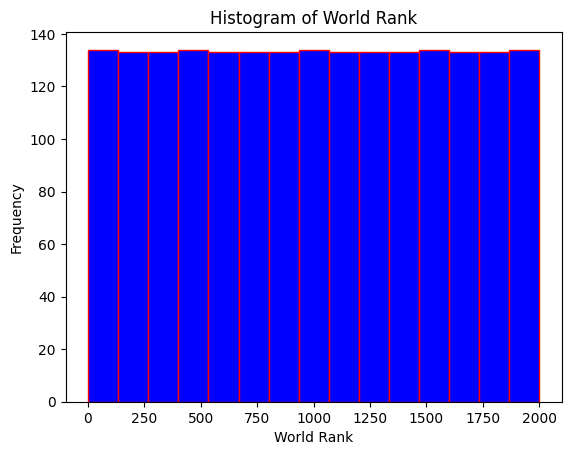

In [57]:
plt.hist(df_CWU['World Rank'],facecolor = 'b', edgecolor = 'red', bins = 15) 
plt.xlabel('World Rank')
plt.ylabel('Frequency')
plt.title(f'Histogram of World Rank')
plt.show()

**Plotly - Chart**

In [58]:
# Ensure 'World Rank' is numeric if it's not already (assuming it's all valid numeric data)
df_CWU['World Rank'] = pd.to_numeric(df_CWU['World Rank'], errors='coerce')

# Create a histogram using Plotly Express
fig = px.histogram(
    df_CWU,
    x='World Rank',
    nbins=15,  # Number of bins
    title='Histogram of World Rank',
    color_discrete_sequence=['blue']  # Set bar color to blue
)

# Update layout to add red edges to the bars
fig.update_traces(marker=dict(line=dict(color='white', width=2)))

# Add labels
fig.update_layout(
    xaxis_title='World Rank',
    yaxis_title='Frequency',
    bargap=0.2  # Adjust the gap between bars
)

# Show the plot
fig.show()

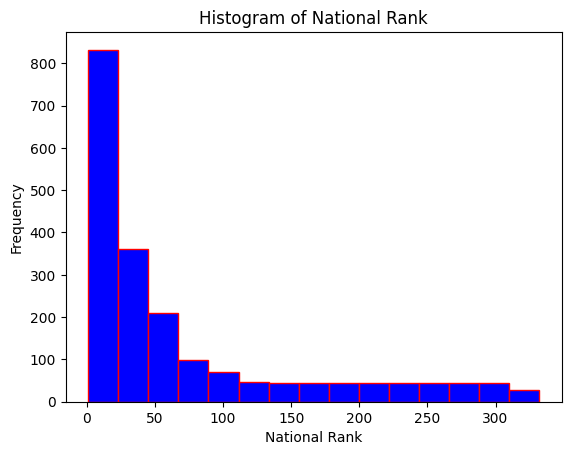

In [59]:
plt.hist(df_CWU['National Rank'],facecolor = 'b', edgecolor = 'red', bins = 15) 
plt.xlabel('National Rank')
plt.ylabel('Frequency')
plt.title(f'Histogram of National Rank')
plt.show()

**Plotly - Chart**

In [60]:
# Convert 'National Rank' to numeric if it's not already (assuming it's all valid numeric data)
df_CWU['National Rank'] = pd.to_numeric(df_CWU['National Rank'], errors='coerce')

# Create a histogram using Plotly Express
fig = px.histogram(
    df_CWU,
    x='National Rank',
    nbins=15,  # Number of bins
    title='Histogram of National Rank',
    color_discrete_sequence=['blue']  # Set bar color to blue
)

# Update layout to add red edges to the bars
fig.update_traces(marker=dict(line=dict(color='white', width=2)))

# Add labels
fig.update_layout(
    xaxis_title='National Rank',
    yaxis_title='Frequency',
    bargap=0.2  # Adjust the gap between bars
)

# Show the plot
fig.show()

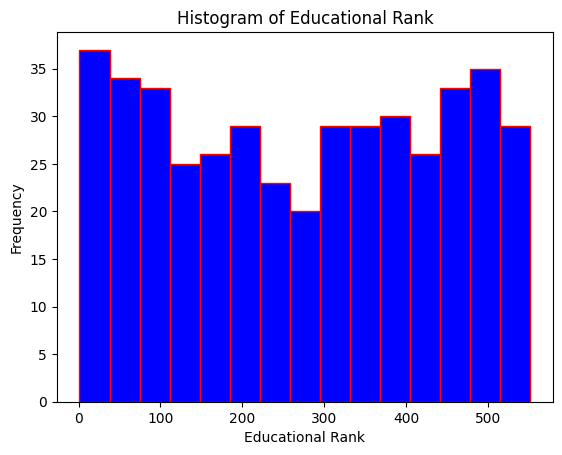

In [61]:
plt.hist(df_CWU['Educational Rank'][df_CWU['Educational Rank']!=0],facecolor = 'b', edgecolor = 'red', bins = 15) 
plt.xlabel('Educational Rank')
plt.ylabel('Frequency')
plt.title(f'Histogram of Educational Rank')
plt.show()

**Plotly - Chart**

In [62]:
# Convert 'Educational Rank' to numeric and filter out zeros
df_CWU['Educational Rank'] = pd.to_numeric(df_CWU['Educational Rank'], errors='coerce')
df_non_zero_educational = df_CWU[df_CWU['Educational Rank'] != 0]

# Create a histogram using Plotly Express
fig = px.histogram(
    df_non_zero_educational,
    x='Educational Rank',
    nbins=15,  # Number of bins
    title='Histogram of Educational Rank',
    color_discrete_sequence=['blue']  # Set bar color to blue
)

# Update layout to add red edges to the bars
fig.update_traces(marker=dict(line=dict(color='white', width=2)))

# Add labels
fig.update_layout(
    xaxis_title='Educational Rank',
    yaxis_title='Frequency',
    bargap=0.2  # Adjust the gap between bars
)

# Show the plot
fig.show()

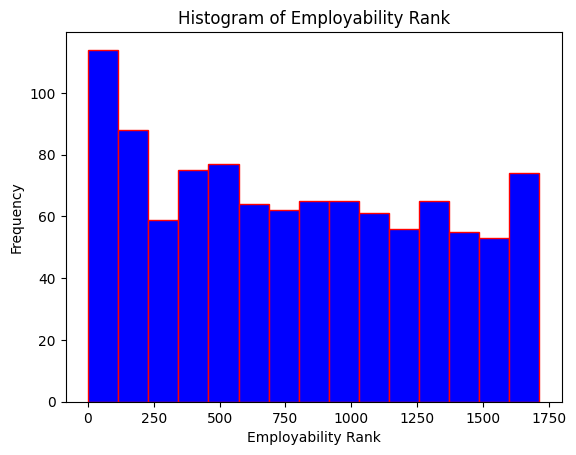

In [63]:
plt.hist(df_CWU['Employability Rank'][df_CWU['Employability Rank']!=0],facecolor = 'b', edgecolor = 'red', bins = 15) 
plt.xlabel('Employability Rank')
plt.ylabel('Frequency')
plt.title(f'Histogram of Employability Rank')
plt.show()

**Plotly - Chart**

In [64]:
# Convert 'Employability Rank' to numeric and filter out zeros
df_CWU['Employability Rank'] = pd.to_numeric(df_CWU['Employability Rank'], errors='coerce')
df_non_zero_employability = df_CWU[df_CWU['Employability Rank'] != 0]

# Create a histogram using Plotly Express
fig = px.histogram(
    df_non_zero_employability,
    x='Employability Rank',
    nbins=15,  # Number of bins
    title='Histogram of Employability Rank',
    color_discrete_sequence=['blue']  # Set bar color to blue
)

# Update layout to add red edges to the bars
fig.update_traces(marker=dict(line=dict(color='white', width=2)))

# Add labels
fig.update_layout(
    xaxis_title='Employability Rank',
    yaxis_title='Frequency',
    bargap=0.2  # Adjust the gap between bars
)

# Show the plot
fig.show()

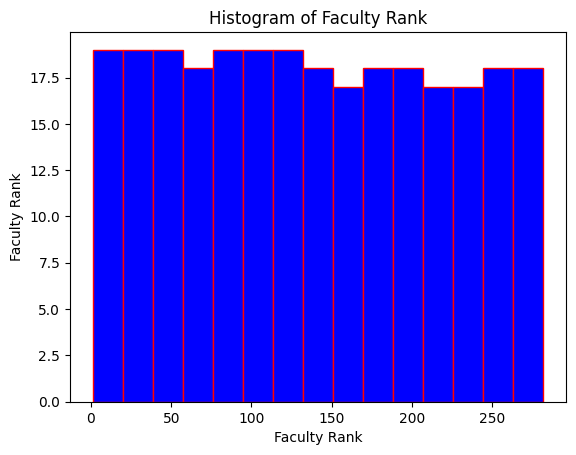

In [65]:
plt.hist(df_CWU['Faculty Rank'][df_CWU['Faculty Rank']!=0],facecolor = 'b', edgecolor = 'red', bins = 15) 
plt.xlabel('Faculty Rank')
plt.ylabel('Faculty Rank')
plt.title(f'Histogram of Faculty Rank')
plt.show()

**Plotly - Chart**

In [66]:
# Convert 'Faculty Rank' to numeric and filter out zeros
df_CWU['Faculty Rank'] = pd.to_numeric(df_CWU['Faculty Rank'], errors='coerce')
df_non_zero_faculty = df_CWU[df_CWU['Faculty Rank'] != 0]

# Create a histogram using Plotly Express
fig = px.histogram(
    df_non_zero_faculty,
    x='Faculty Rank',
    nbins=15,  # Number of bins
    title='Histogram of Faculty Rank',
    color_discrete_sequence=['blue']  # Set bar color to blue
)

# Update layout to add red edges to the bars
fig.update_traces(marker=dict(line=dict(color='white', width=2)))

# Add labels
fig.update_layout(
    xaxis_title='Faculty Rank',
    yaxis_title='Count',
    bargap=0.2  # Adjust the gap between bars
)

# Show the plot
fig.show()

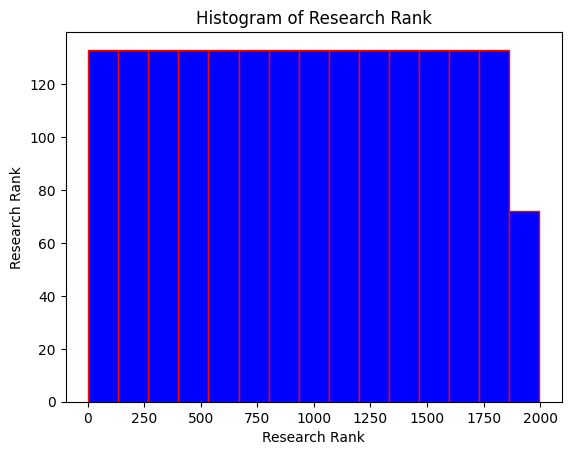

In [67]:
plt.hist(df_CWU['Research Rank'][df_CWU['Research Rank']!=0],facecolor = 'b', edgecolor = 'red', bins = 15) 
plt.xlabel('Research Rank')
plt.ylabel('Research Rank')
plt.title(f'Histogram of Research Rank')
plt.show()

**Plotly - Chart**

In [68]:
# Ensure 'Research Rank' is numeric and filter out zeros
df_CWU['Research Rank'] = pd.to_numeric(df_CWU['Research Rank'], errors='coerce')
df_non_zero_research = df_CWU[df_CWU['Research Rank'] != 0]

# Create a histogram using Plotly Express
fig = px.histogram(
    df_non_zero_research,
    x='Research Rank',
    nbins=15,  # Number of bins
    title='Histogram of Research Rank',
    color_discrete_sequence=['blue']  # Set bar color to blue
)

# Update layout to add red edges to the bars
fig.update_traces(marker=dict(line=dict(color='white', width=2)))

# Add labels
fig.update_layout(
    xaxis_title='Research Rank',
    yaxis_title='Count',
    bargap=0.2  # Adjust the gap between bars
)

# Show the plot
fig.show()

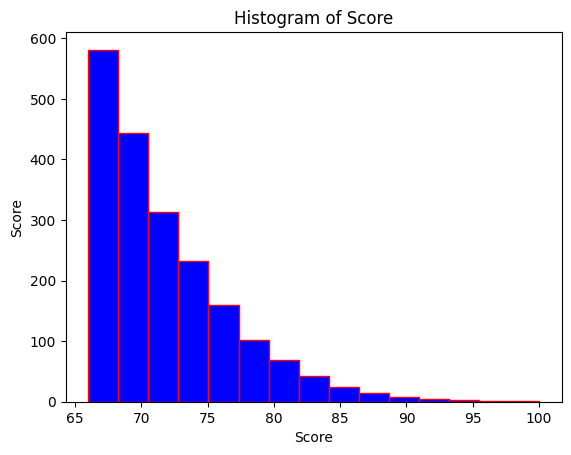

In [69]:
plt.hist(df_CWU['Score'],facecolor = 'b', edgecolor = 'red', bins = 15) 
plt.xlabel('Score')
plt.ylabel('Score')
plt.title(f'Histogram of Score')
plt.show()

**Plotly - Chart**

In [70]:
# Ensure 'Score' is numeric if it's not already
df_CWU['Score'] = pd.to_numeric(df_CWU['Score'], errors='coerce')

# Create a histogram using Plotly Express
fig = px.histogram(
    df_CWU,
    x='Score',
    nbins=15,  # Number of bins
    title='Histogram of Score',
    color_discrete_sequence=['blue']  # Set bar color to blue
)

# Update layout to add red edges to the bars
fig.update_traces(marker=dict(line=dict(color='white', width=2)))

# Add labels
fig.update_layout(
    xaxis_title='Score',
    yaxis_title='Count',
    bargap=0.2  # Adjust the gap between bars
)

# Show the plot
fig.show()

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [71]:
# this table is biased due to the replacement of empty nulls with 0
df_CWU.describe().T

,count,mean,std,min,25%,50%,75%,max
World Rank,2000.0,1000.50000,577.494589,1.0,500.75,1000.5,1500.25,2000.0
National Rank,2000.0,69.24500,85.538608,1.0,9.75,33.0,89.00,332.0
Educational Rank,2000.0,60.04250,137.715284,0.0,0.00,0.0,0.00,552.0
Employability Rank,2000.0,407.17600,539.997212,0.0,0.00,33.5,793.25,1713.0
Faculty Rank,2000.0,18.97100,56.385901,0.0,0.00,0.0,0.00,282.0
Research Rank,2000.0,935.77000,576.062685,0.0,434.75,934.5,1434.25,1996.0
Score,2000.0,71.75555,5.038800,66.0,67.90,70.4,74.30,100.0


## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

In [72]:
'''We Dont have this type of relation'''

'We Dont have this type of relation'

**Categorical & numerical --> (scatter plot, histogram, box plot)**

Which universities are ranked in the top 10 globally?

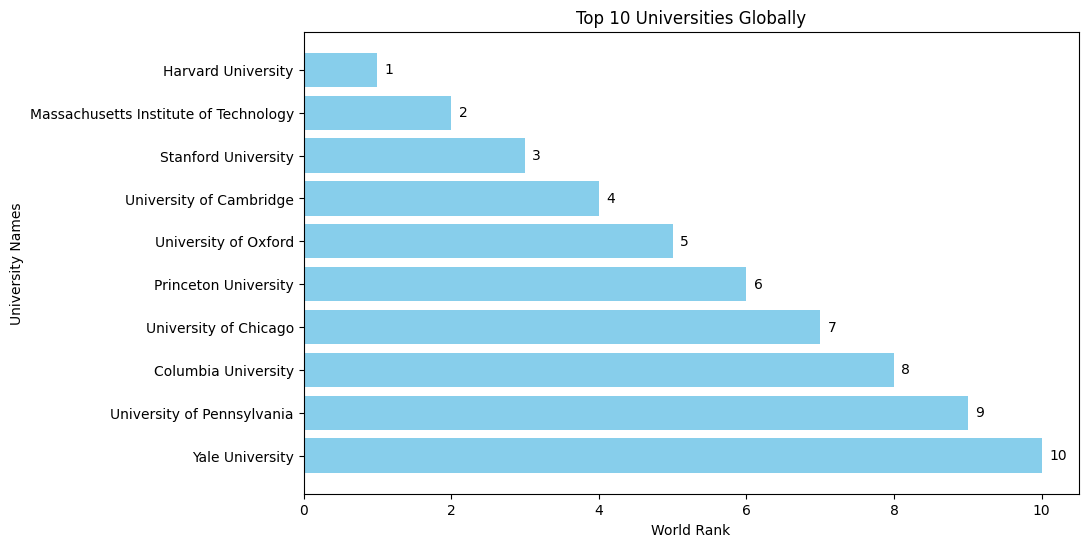

In [73]:
# Filter top 10 universities
top_10_universities = df_CWU[df_CWU["World Rank"] <= 10]

# Plotting 
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_universities["University Names"], top_10_universities["World Rank"], color='skyblue')

plt.xlabel('World Rank')
plt.ylabel('University Names')
plt.title('Top 10 Universities Globally')
plt.gca().invert_yaxis()  
# Display t
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.0f}', va='center')

plt.show()


**Plotly - Chart**

In [74]:
# Convert 'World Rank' to numeric, handling errors if they are not already integers
df_CWU['World Rank'] = pd.to_numeric(df_CWU['World Rank'], errors='coerce')

# Filter top 10 universities globally
top_10_universities = df_CWU[df_CWU["World Rank"] <= 10]
top_10_universities = top_10_universities.sort_values(by='World Rank', ascending=True)  # Ensure sorting

# Create the Plotly bar chart (horizontal bar chart)
fig = px.bar(
    top_10_universities,
    y='University Names',
    x='World Rank',
    text='World Rank',  # This will place the rank number on each bar
    orientation='h',  # Horizontal bar chart
    title='Top 10 Universities Globally',
    color='World Rank',  # Color can be based on the world rank for extra visual information
    color_continuous_scale='Blues'  # A blue color scale to match 'skyblue'
)

# Reverse the y-axis to match the original Matplotlib output
fig.update_layout(yaxis={'categoryorder':'total ascending'})

# Improve aesthetics by updating axes titles and adding the text label inside the bars
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(
    xaxis_title='World Rank',
    yaxis_title='University Names'
)

# Show the plot
fig.show()

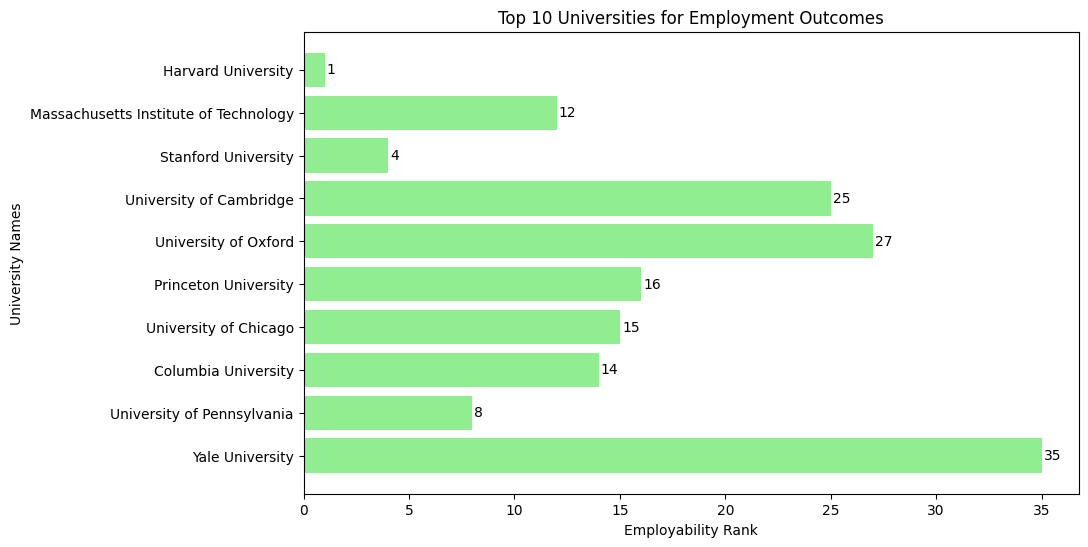

In [75]:
# Filter top 10 universities for employment outcomes
top_10_employment = df_CWU[df_CWU["Employability Rank"] <= 10]
top_10_employment = df_CWU[df_CWU["Employability Rank"] >= 1].head(10)
# Plotting 
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_employment["University Names"], top_10_employment["Employability Rank"], color='lightgreen')

plt.xlabel('Employability Rank')
plt.ylabel('University Names')
plt.title('Top 10 Universities for Employment Outcomes')
plt.gca().invert_yaxis()  


for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.0f}', va='center')

plt.show()


**Plotly - Chart**

In [76]:
fig = px.bar(
    top_10_employment,
    y='University Names',
    x='Employability Rank',
    text='Employability Rank',
    orientation='h',
    title='Top 10 Universities for Employment Outcomes',
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(xaxis_title='Employability Rank', yaxis_title='University Names')
fig.show()

**numerical & numerical --> (Scatter plot, line chart)**

Which universities are ranked in the top 10 for employment outcomes?

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

In [77]:
corr_matrix = df_CWU.select_dtypes(include=np.number).corr()
corr_matrix

,World Rank,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
World Rank,1.000000,0.352692,-0.345331,-0.165453,-0.342142,0.897083,-0.916493
National Rank,0.352692,1.000000,-0.098034,0.021179,-0.119690,0.274974,-0.335179
Educational Rank,-0.345331,-0.098034,1.000000,0.091646,0.353059,-0.314040,0.332856
Employability Rank,-0.165453,0.021179,0.091646,1.000000,0.031871,-0.144786,0.091413
Faculty Rank,-0.342142,-0.119690,0.353059,0.031871,1.000000,-0.312016,0.367324
Research Rank,0.897083,0.274974,-0.314040,-0.144786,-0.312016,1.000000,-0.827959
Score,-0.916493,-0.335179,0.332856,0.091413,0.367324,-0.827959,1.000000


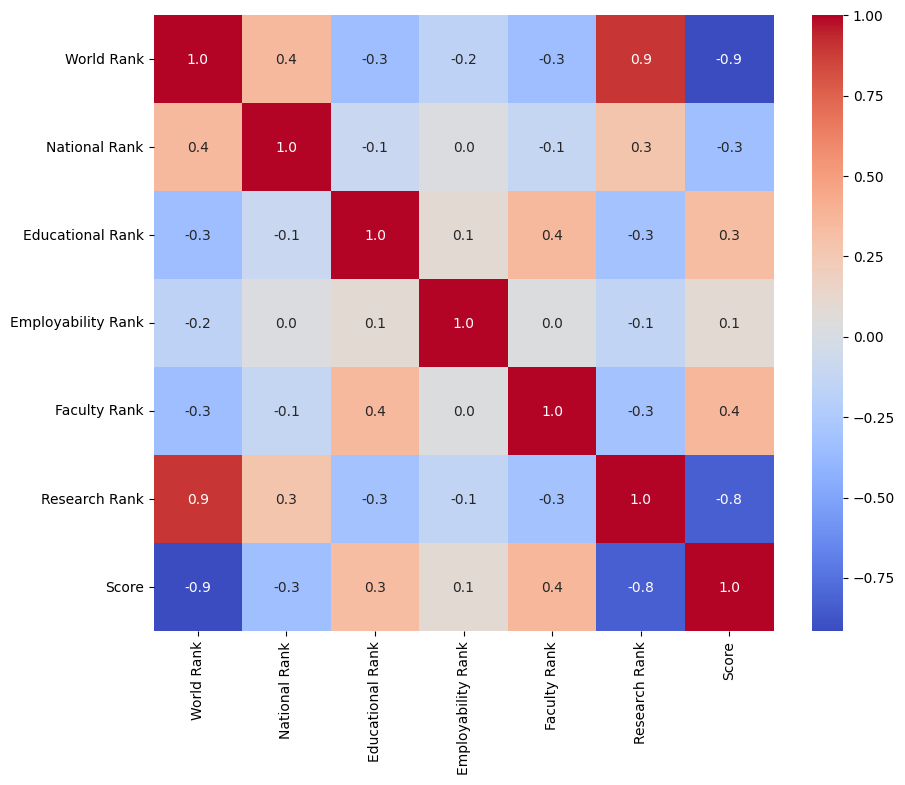

In [78]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True, 
            cmap='coolwarm',
            fmt=".1f"
           )

# Show the plot
plt.show()

In [79]:
df_CWU[df_CWU["Location"] == "Saudi Arabia"]#.nsmallest(10,"National Rank")

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
244,245,King Abdulaziz University,Saudi Arabia,1,0,1330,0,186,77.8
278,279,King Abdullah University of Science and Techno...,Saudi Arabia,2,0,0,171,297,77.2
351,352,King Saud University,Saudi Arabia,3,0,344,0,332,76.1
656,657,King Fahd University of Petroleum and Minerals,Saudi Arabia,4,0,107,0,792,72.8
1310,1311,King Saud bin Abdulaziz University for Health ...,Saudi Arabia,5,0,0,0,1255,68.8
1446,1447,King Khalid University,Saudi Arabia,6,0,0,0,1385,68.1
1508,1509,Taif University,Saudi Arabia,7,0,0,0,1445,67.9
1546,1547,Imam Abdulrahman Bin Faisal University,Saudi Arabia,8,0,0,0,1484,67.7
1585,1586,Taibah University,Saudi Arabia,9,0,0,0,1520,67.5
1710,1711,Prince Sattam Bin Abdulaziz University,Saudi Arabia,10,0,0,0,1636,67.0


In [80]:
df_CWU[df_CWU["Location"] == "Saudi Arabia"]

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
244,245,King Abdulaziz University,Saudi Arabia,1,0,1330,0,186,77.8
278,279,King Abdullah University of Science and Techno...,Saudi Arabia,2,0,0,171,297,77.2
351,352,King Saud University,Saudi Arabia,3,0,344,0,332,76.1
656,657,King Fahd University of Petroleum and Minerals,Saudi Arabia,4,0,107,0,792,72.8
1310,1311,King Saud bin Abdulaziz University for Health ...,Saudi Arabia,5,0,0,0,1255,68.8
1446,1447,King Khalid University,Saudi Arabia,6,0,0,0,1385,68.1
1508,1509,Taif University,Saudi Arabia,7,0,0,0,1445,67.9
1546,1547,Imam Abdulrahman Bin Faisal University,Saudi Arabia,8,0,0,0,1484,67.7
1585,1586,Taibah University,Saudi Arabia,9,0,0,0,1520,67.5
1710,1711,Prince Sattam Bin Abdulaziz University,Saudi Arabia,10,0,0,0,1636,67.0


In [81]:
df_sa = df_CWU[df_CWU["Location"] == "Saudi Arabia"].head(15)

df_sa = df_sa.sort_values("World Rank", ascending=False)

fig = plo.Figure(data=[plo.Bar(y=df_sa["University Names"], x=df_sa["World Rank"], orientation='h')])

fig.update_layout(
    title="Top 15 Universities in Saudi Arabia by World Rank",
    xaxis_title="World Rank",
    yaxis_title="University",
    height=500,
    width=800
)

fig.show()

In [82]:
columns = ['World Rank', 'Employability Rank', 'Research Rank', 'Educational Rank']
subset_df_CWU = df_CWU[columns]
correlation_matrix = subset_df_CWU.corr()

# Create the text labels for the correlation values
text_values = [['{:.2f}'.format(value) for value in row] for row in correlation_matrix.values]

fig = px.imshow(text_values,
                 text_auto=True,
                 x=correlation_matrix.columns, 
                 y=correlation_matrix.columns,
                 color_continuous_scale='RdBu_r'
                 )

fig.update_layout(
    title='Correlation Matrix')
fig.show()

In [89]:
# Calculate correlation
correlation = df_CWU['World Rank'].corr(df_CWU['National Rank'])
print("Correlation coefficient:", correlation)

# Scatter plot for visualizing the correlation, colored by location
fig = px.scatter(df_CWU, x='World Rank', y='National Rank', color='Location',
                 hover_data=['University Names', 'Location'])
fig.update_layout(title='Correlation between World Rank and National Rank by Country',
                  xaxis_title='World Rank', yaxis_title='National Rank',
                  legend_title='Country')
fig.show()

Correlation coefficient: 0.3526922723262442


In [107]:
# Sort universities within each country by the world rank
df_CWU_sorted = df_CWU.sort_values(by=['Location', 'World Rank'])

# Select the top 3 universities from each country
top_3_universities_per_country = df_CWU_sorted.groupby('Location').head(3)

# Display the top 3 universities for each country
print(top_3_universities_per_country[['World Rank', 'University Names', 'Location']])

      World Rank                                   University Names   Location
1929        1930  University of Science and Technology Houari Bo...    Algeria
1994        1995      University of Djillali Liabès, Sidi Bel-Abbès    Algeria
381          382                         University of Buenos Aires  Argentina
682          683                    National University of La Plata  Argentina
988          989                     National University of Córdoba  Argentina
...          ...                                                ...        ...
1093        1094                                 Duy Tân University    Vietnam
1155        1156                           Tôn Đức Thắng University    Vietnam
1199        1200                 Vietnam National University, Hanoi    Vietnam
1577        1578                               University of Zambia     Zambia
1775        1776                             University of Zimbabwe   Zimbabwe

[229 rows x 3 columns]


In [108]:
# Define a function to calculate correlation within each group
def calculate_correlation(data):
    if data.shape[0] > 1:  # Ensure there are at least two data points for correlation
        return data['World Rank'].corr(data['National Rank'])
    else:
        return None  # Not enough data to calculate correlation

# Apply the correlation function to each group by country
country_correlations = df_CWU.groupby('Location').apply(calculate_correlation).dropna()


C:\Users\Riyadh\AppData\Local\Temp\ipykernel_2448\3521887199.py:9: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [109]:
# Filter to get only top 100 universities globally
top_universities = df_CWU[df_CWU['World Rank'] <= 100]

# Count how many top universities each country has
country_top_uni_counts = top_universities['Location'].value_counts()


In [117]:
# Create a DataFrame to merge both correlation and counts
combined_data = pd.DataFrame({
    'Correlation': country_correlations,
    'Count of Universities': country_top_uni_counts
}).dropna()  # Drop any row with NA values, which might occur if no top 100 universities

# Sort countries by both high correlation and high number of top 100 universities
recommended_countries = combined_data.sort_values(by=['Correlation', 'Count of Universities'], ascending=[False, False]).head(3)
display(recommended_countries)

,Correlation,Count of Universities
Location,,
China,0.999528,6.0
France,0.994443,5.0
South Korea,0.994247,1.0


In [118]:
recommended_country_names = recommended_countries.index.tolist()
filtered_best_unis = df_CWU[df_CWU['Location'].isin(recommended_country_names)]

# Group by country and get the university with the highest rank (smallest number)
best_universities = filtered_best_unis.loc[filtered_best_unis.groupby('Location')['World Rank'].idxmin()]
best_universities = best_universities.set_index('Location')[['University Names', 'World Rank']]  # Set the index to 'Location' for easy merging


In [119]:
# Merge the best universities with the recommended countries DataFrame
final_recommendations = recommended_countries.join(best_universities)
final_recommendations = final_recommendations.rename(columns={'University Names': 'Best University', 'World Rank': 'Best University World Rank'})

# Display the final DataFrame with recommended countries and their best universities
display(final_recommendations)


,Correlation,Count of Universities,Best University,Best University World Rank
Location,,,,
China,0.999528,6.0,Tsinghua University,44
France,0.994443,5.0,PSL University,21
South Korea,0.994247,1.0,Seoul National University,31
